In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
train = pd.read_csv("train.csv", parse_dates=['srch_ci', 'srch_co'],nrows=10000000)

In [3]:
train = train.sample(frac=0.0025, replace= False, random_state = 101)

Column name    |    Description    |    Data type
---| ---| ---
date_time    |    Timestamp    |    string
site_name    |    ID of the Expedia point of sale (i.e. Expedia.com, Expedia.co.uk, Expedia.co.jp, ...)    |    int
posa_continent    |    ID of continent associated with site_name    |    int
user_location_country    |    The ID of the country the customer is located    |    int
user_location_region    |    The ID of the region the customer is located    |    int
user_location_city    |    The ID of the city the customer is located    |    int
orig_destination_distance    |    Physical distance between a hotel and a customer at the time of search. A null means the distance could not be calculated    |    double
user_id    |    ID of user    |    int
is_mobile    |    1 when a user connected from a mobile device, 0 otherwise    |    tinyint
is_package    |    1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise    |    int
channel    |    ID of a marketing channel    |    int
srch_ci    |    Checkin date    |    string
srch_co    |    Checkout date    |    string
srch_adults_cnt    |    The number of adults specified in the hotel room    |    int
srch_children_cnt    |    The number of (extra occupancy) children specified in the hotel room    |    int
srch_rm_cnt    |    The number of hotel rooms specified in the search    |    int
srch_destination_id    |    ID of the destination where the hotel search was performed    |    int
srch_destination_type_id    |    Type of destination    |    int
hotel_continent    |    Hotel continent    |    int
hotel_country    |    Hotel country    |    int
hotel_market    |    Hotel market    |    int
is_booking    |    1 if a booking, 0 if a click    |    tinyint
cnt    |    Numer of similar events in the context of the same user session    |    bigint
hotel_cluster    |    ID of a hotel cluster    |    int

# DATA EXPLORATION

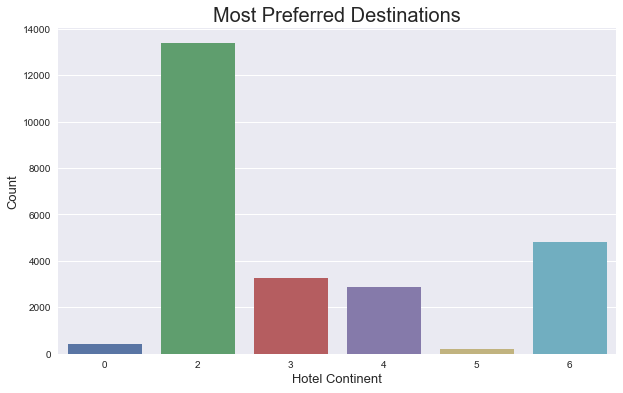

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
# preferred continent destinations

plt.figure(figsize=(10,6))
sns.countplot(x='hotel_continent', data=train )
plt.title('Most Preferred Destinations', fontsize = 20)
plt.xlabel('Hotel Continent', fontsize = 13 )
plt.ylabel('Count', fontsize = 13)
plt.show()

* ### _Continent 2 has the most preferred destinations_

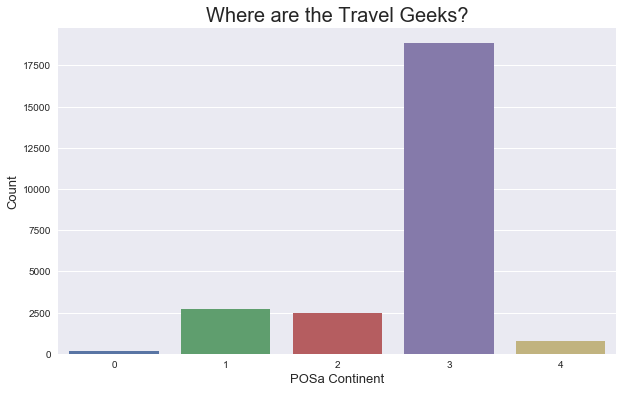

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(x='posa_continent', data=train)
plt.title('Where are the Travel Geeks?', fontsize = 20)
plt.xlabel('POSa Continent', fontsize = 13 )
plt.ylabel('Count', fontsize = 13)
plt.show()

* ### _Travel geeks of the world reside in continent 3_

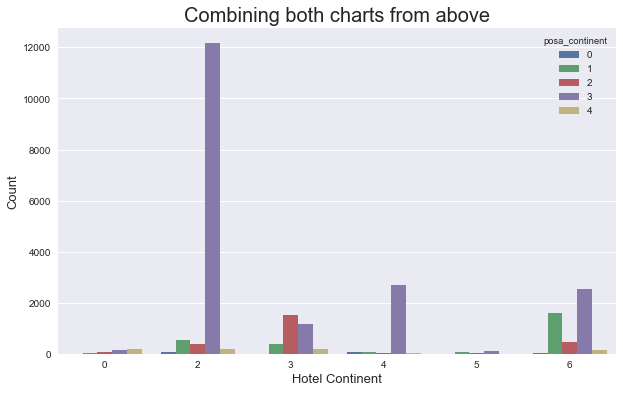

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(x='hotel_continent', hue='posa_continent', data=train)
plt.title('Combining both charts from above', fontsize = 20)
plt.xlabel('Hotel Continent', fontsize = 13 )
plt.ylabel('Count', fontsize = 13)
plt.show()

In [7]:
import datetime as dt
from datetime import datetime

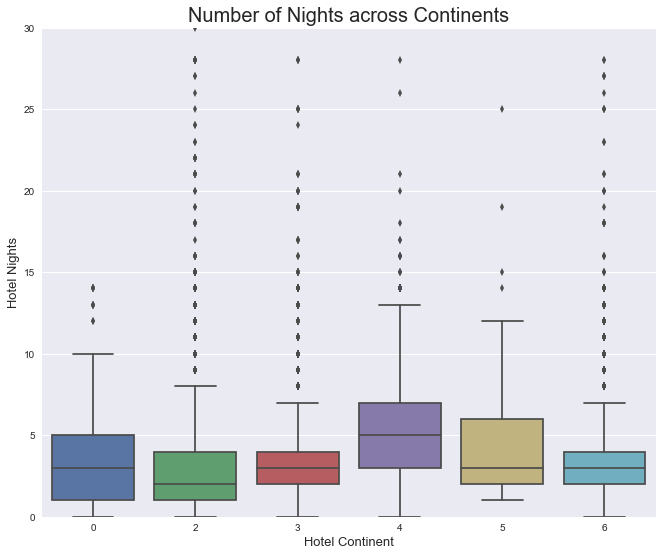

In [8]:
hotel_nights = pd.to_datetime(train['srch_co']) - pd.to_datetime(train['srch_ci']) 
hotel_nights = (hotel_nights / np.timedelta64(1, 'D')).astype(float) 
train['hotel_nights'] = hotel_nights
plt.figure(figsize=(11, 9))
ax = sns.boxplot(x='hotel_continent', y='hotel_nights', data=train)
lim = ax.set(ylim=(0, 30))
plt.title('Number of Nights across Continents', fontsize = 20)
plt.xlabel('Hotel Continent', fontsize = 13 )
plt.ylabel('Hotel Nights', fontsize = 13)
plt.show()

### _Continent 4 clearly has longer average length of stay at a hotel_

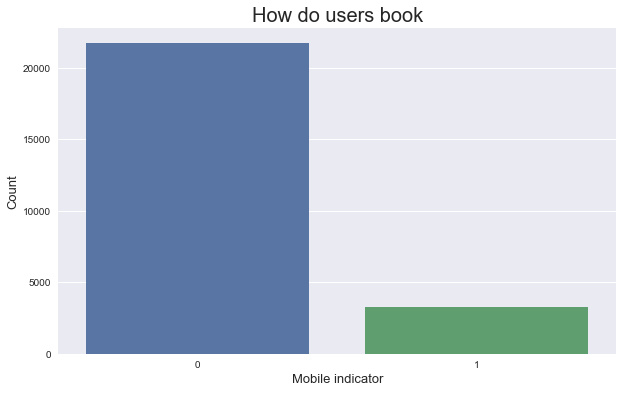

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='is_mobile', data=train)
plt.title('How do users book', fontsize = 20)
plt.xlabel('Mobile indicator', fontsize = 13 )
plt.ylabel('Count', fontsize = 13)
plt.show()

* ### _Most users search on Desktop_

In [10]:
train.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,hotel_nights
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,16153.000000,2.500000e+04,25000.00000,25000.000000,25000.00000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24968.000000
mean,9.706640,2.691800,86.893480,304.303480,27767.690280,1967.891519,5.973696e+05,0.13136,0.249760,5.85464,...,1.109440,14333.052720,2.563760,0.079720,1.486040,3.122240,80.624000,596.577440,49.692040,3.362784
std,11.836487,0.733454,60.346727,204.524244,16814.318123,2227.854766,3.515737e+05,0.33780,0.432883,3.72405,...,0.454083,10984.252258,2.145031,0.270865,1.206625,1.599212,55.766593,507.631398,29.049366,3.367623
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.140000e+02,0.00000,0.000000,0.00000,...,1.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-259.000000
25%,2.000000,3.000000,66.000000,174.000000,13021.000000,313.310700,2.893265e+05,0.00000,0.000000,2.00000,...,1.000000,8266.000000,1.000000,0.000000,1.000000,2.000000,50.000000,171.000000,25.000000,1.000000
50%,2.000000,3.000000,66.000000,311.000000,27607.000000,1141.994100,5.904370e+05,0.00000,0.000000,9.00000,...,1.000000,8864.000000,1.000000,0.000000,1.000000,2.000000,50.000000,595.000000,49.000000,3.000000
75%,13.000000,3.000000,77.000000,373.250000,42527.000000,2554.359400,9.033822e+05,0.00000,0.000000,9.00000,...,1.000000,18569.000000,5.000000,0.000000,2.000000,4.000000,105.000000,701.000000,73.000000,4.000000
max,53.000000,4.000000,239.000000,1017.000000,56507.000000,11632.513100,1.198722e+06,1.00000,1.000000,10.00000,...,8.000000,65021.000000,9.000000,1.000000,23.000000,6.000000,212.000000,2117.000000,99.000000,125.000000


In [11]:
from matplotlib import pyplot as plt 

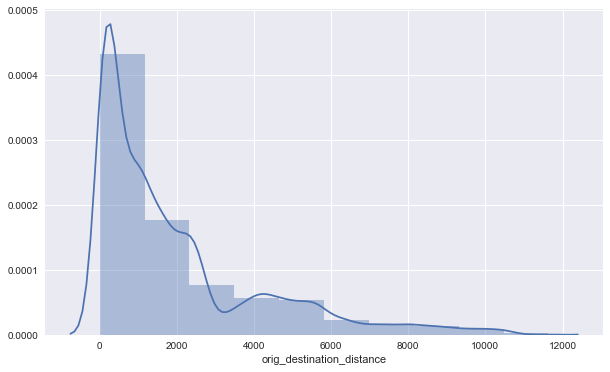

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(train.orig_destination_distance.dropna(),bins=10)
plt.show()

In [13]:
train_new = train.copy()

In [14]:
 train_new['date_time_mod'] = map(lambda x: x.date(), pd.to_datetime(train_new['date_time']))

In [15]:
days_2_travel = pd.to_datetime(train_new['srch_ci'])- pd.to_datetime(train_new['date_time_mod'])
days_2_travel = (days_2_travel / np.timedelta64(1, 'D')).astype(float) 

In [16]:
train_new['days_2_travel'] = days_2_travel

In [17]:
train_new['orig_destination_distance'] = train_new['orig_destination_distance'].fillna(train_new['orig_destination_distance'].mean()) 

In [18]:
train_new = train_new.dropna()
train_new = train_new[train_new.hotel_nights >= 0]
train_new = train_new[train_new.days_2_travel >= 0]

In [19]:
train_new['checkin_day'] = map(lambda x: x.weekday(), pd.to_datetime(train_new['srch_ci']))
train_new['checkout_day'] = map(lambda x: x.weekday(), pd.to_datetime(train_new['srch_co']))

In [20]:
#m = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [21]:
#train_new['checkin_day'] = train_new.checkin_day.map(m)

In [22]:
def select(row):
    if (row['checkin_day'] >= 4) & (row['hotel_nights'] >= 2):
        return 1
    else:
        return 0

train_new['is_weekend_travel'] = train_new.apply(select, axis=1)

In [23]:
cols = ['is_weekend_travel', 'hotel_nights', 'days_2_travel', 'srch_children_cnt']

In [24]:
cluster_data = pd.DataFrame(train_new,columns = cols)

In [25]:
cluster_data.head()

,is_weekend_travel,hotel_nights,days_2_travel,srch_children_cnt
4639166,1,2.0,55.0,0
4410672,0,1.0,301.0,0
6474074,0,6.0,261.0,0
9541197,0,3.0,20.0,0
6333373,1,5.0,56.0,2


In [26]:
from sklearn import preprocessing
cluster_data_new = pd.DataFrame(preprocessing.StandardScaler().fit_transform(cluster_data),index=cluster_data.index)

In [27]:
cluster_data_new.columns = cluster_data.columns

In [28]:
cluster_data_new.head()

,is_weekend_travel,hotel_nights,days_2_travel,srch_children_cnt
4639166,1.385345,-0.468785,0.007013,-0.460975
4410672,-0.721842,-0.810083,3.771352,-0.460975
6474074,-0.721842,0.896409,3.159265,-0.460975
9541197,-0.721842,-0.127486,-0.528564,-0.460975
6333373,1.385345,0.555111,0.022315,2.268028


In [29]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import cluster
cluster_range = range(2,10)
cluster_scores = []
for k in cluster_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cluster_data_new)
    cluster_scores.append(metrics.silhouette_score(cluster_data_new, km.labels_))

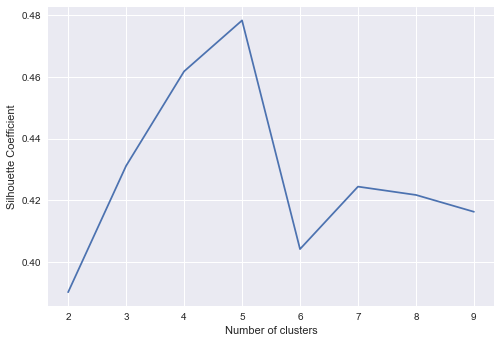

In [30]:
plt.plot(cluster_range, cluster_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [31]:
km = KMeans(n_clusters=5, random_state=1)
km.fit(cluster_data_new)
cluster_data_new['cluster'] = km.labels_

In [32]:
km.cluster_centers_

array([[ 1.38534519,  0.0878237 , -0.19123879, -0.28105236],
       [ 0.02192306,  0.3094729 ,  2.34431743, -0.14065348],
       [-0.72184175, -0.33469449, -0.36364667, -0.30027631],
       [ 0.07151594, -0.00879268, -0.01760026,  2.61207864],
       [ 0.07140002,  3.15450622,  0.34203623, -0.09366445]])

In [33]:
train_new['label'] = cluster_data_new['cluster']
cluster_data['cluster'] = cluster_data_new['cluster']

In [34]:
train_new.groupby('label').count()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,hotel_continent,hotel_country,hotel_market,hotel_cluster,hotel_nights,date_time_mod,days_2_travel,checkin_day,checkout_day,is_weekend_travel
label,,,,,,,,,,,,,,,,,,,,,
0,6469,6469,6469,6469,6469,6469,6469,6469,6469,6469,...,6469,6469,6469,6469,6469,6469,6469,6469,6469,6469
1,2394,2394,2394,2394,2394,2394,2394,2394,2394,2394,...,2394,2394,2394,2394,2394,2394,2394,2394,2394,2394
2,12814,12814,12814,12814,12814,12814,12814,12814,12814,12814,...,12814,12814,12814,12814,12814,12814,12814,12814,12814,12814
3,2332,2332,2332,2332,2332,2332,2332,2332,2332,2332,...,2332,2332,2332,2332,2332,2332,2332,2332,2332,2332
4,950,950,950,950,950,950,950,950,950,950,...,950,950,950,950,950,950,950,950,950,950


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x188303ed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x17a6d9b90>]], dtype=object)

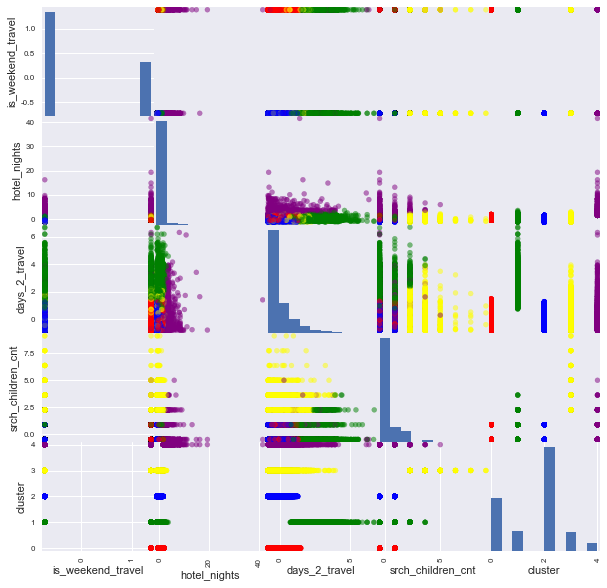

In [35]:
colors = np.array(['red', 'green', 'blue', 'yellow', 'purple'])
pd.scatter_matrix(cluster_data_new, c=colors[list(cluster_data_new.cluster)], figsize=(10,10), s=100)

In [37]:
train_x_data = train_new[['posa_continent','channel','user_location_city',
        'is_mobile','orig_destination_distance','hotel_cluster', 
        'hotel_continent', 'hotel_country', 'hotel_market','label']]

In [38]:
x_final = pd.get_dummies(train_x_data, 
                          columns=['posa_continent','channel','user_location_city','is_mobile','hotel_cluster', 'hotel_continent', 'hotel_country', 'hotel_market','label'], 
                          drop_first=True)

In [39]:
y_final = train_new[['is_booking']]

In [40]:
x_final = x_final.values
y_final = y_final.values

In [41]:
c, r  = y_final.shape
y_final = y_final.reshape(c,)

In [42]:
from sklearn import grid_search
from sklearn.linear_model import LogisticRegression

def explore_model(params, model):
    gs = grid_search.GridSearchCV(
        estimator=model,
        cv=5,
        param_grid=params,
        scoring='roc_auc',
        )
    gs.fit(x_final,y_final)
    print gs.best_score_
    print gs.best_estimator_
    return gs

model = LogisticRegression()
params = {"C":[0.1, 0.2, 0.4], 'penalty':['l1','l2']} # put your gradient descent parameters here

explore_model(params,model)

/Users/sahithigaddam/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/sahithigaddam/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.632023711055
LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 0.2, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [43]:
from sklearn import grid_search
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()

params = {'alpha': [10, 20, 40], 'fit_intercept':[True,False], 'normalize':[True, False]} # put your gradient descent parameters here

gs_ridge = grid_search.GridSearchCV(
estimator=model,
cv=5,
param_grid=params,
scoring= 'roc_auc',
)
gs_ridge.fit(x_final,y_final)
print gs_ridge.best_score_
print gs_ridge.best_estimator_

0.629014448966
RidgeClassifier(alpha=40, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)


In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
cm = metrics.confusion_matrix(y_final, gs_ridge.predict(x_final))
print cm

[[22967     0]
 [ 1992     0]]


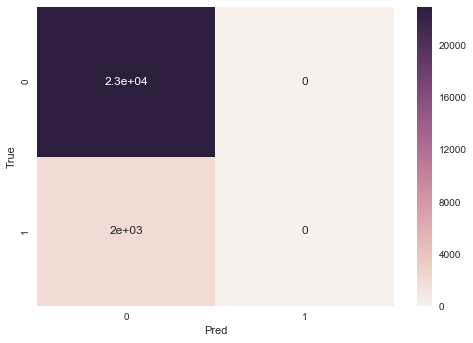

In [46]:
import seaborn as sns
ax = plt.axes()
sns.heatmap(cm, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

In [48]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor

#def explore_model(params, model):
#    gs = grid_search.GridSearchCV(
#        estimator=model,
#        cv=5,
#        param_grid=params,
#        scoring='roc_auc',
#        )
#    gs.fit(x_final,y_final)
#    print gs.best_score_
#    print gs.best_estimator_
#    return gs

#model = RandomForestClassifier(n_estimators=50)
#params = {"n_estimators":[10,50,100], 'max_depth':range(2,15)} # put your gradient descent parameters here
#explore_model(params,model)

In [131]:
train_x_data2 = train_new[['posa_continent','channel','user_location_city',
        'is_mobile','orig_destination_distance','hotel_cluster', 
        'hotel_continent', 'hotel_country', 'hotel_market',
        'srch_destination_type_id','is_weekend_travel', 'days_2_travel', 
        'hotel_nights', 'srch_adults_cnt', 'srch_children_cnt' ]]

In [132]:
x_final2 = pd.get_dummies(train_x_data2, 
                          columns=['posa_continent','channel','user_location_city',
        'is_mobile','hotel_cluster', 
        'hotel_continent', 'hotel_country', 'hotel_market',
        'srch_destination_type_id','is_weekend_travel', 'days_2_travel', 
        'hotel_nights', 'srch_adults_cnt', 'srch_children_cnt' ])

In [133]:
y_final2 = train_new[['is_booking']]

In [134]:
x_final2 = x_final2.values
y_final2 = y_final2.values

In [135]:
c, r  = y_final2.shape
y_final2 = y_final2.reshape(c,)

In [136]:
from sklearn import grid_search
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
params = {"C":[0.1, 0.2, 0.4,0.6,0.8], 'penalty':['l1','l2']} 

gs_log = grid_search.GridSearchCV(
estimator=model,
cv=5,
param_grid=params,
scoring='roc_auc',
)
gs_log.fit(x_final2,y_final2)
print gs_log.best_score_
print gs_log.best_estimator_

0.664997519063
LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [137]:
cm = metrics.confusion_matrix(y_final2, gs_log.predict(x_final2))
print cm

[[22967     0]
 [ 1992     0]]


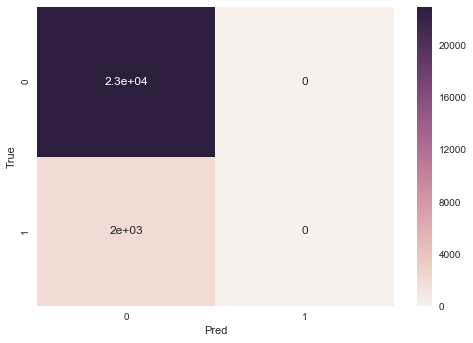

In [138]:
import seaborn as sns
ax = plt.axes()
sns.heatmap(cm, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

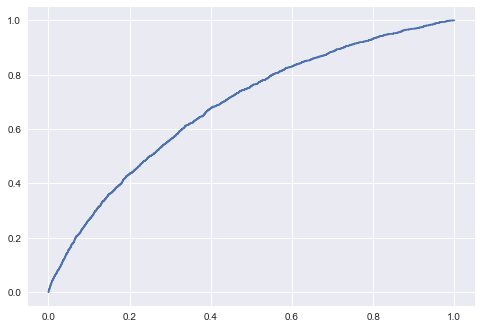

In [168]:
ax = plt.subplot(111)
vals = metrics.roc_curve(y_final2, gs_log.predict_proba(x_final2).T[1])
ax.plot(vals[0], vals[1])
plt.show()

In [174]:
from sklearn import grid_search
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
params = {"C":[0.1, 0.2, 0.4,0.6,0.8], 'penalty':['l1','l2']} 

gs_log2 = grid_search.GridSearchCV(
estimator=model,
cv=5,
param_grid=params,
scoring='precision',
)
gs_log2.fit(x_final2,y_final2)
print gs_log2.best_score_
print gs_log2.best_estimator_

0.300032052566
LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [175]:
cm2 = metrics.confusion_matrix(y_final2, gs_log2.predict(x_final2))
print cm2 

[[22967     0]
 [ 1992     0]]


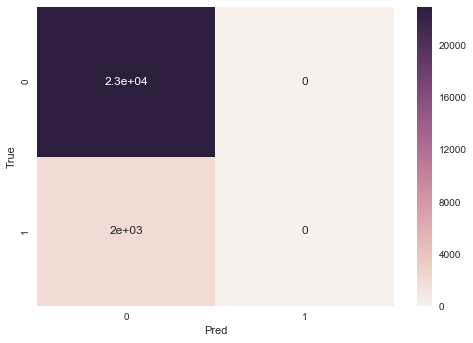

In [177]:
import seaborn as sns
ax = plt.axes()
sns.heatmap(cm2, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

In [189]:
x_final2.shape

(24959, 7646)